In [39]:
import pandas as pd
train = pd.read_csv('ed-titanic-training.csv')
test = pd.read_csv('ed-titanic-test.csv')
train.head(10)


,Unnamed: 0,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,0,0,3,1,1,0,0,0,0,2,0,1
1,1,1,1,0,2,0,3,1,1,2,0,3
2,2,1,3,0,1,0,1,0,0,1,1,4
3,3,1,1,0,2,0,3,0,1,2,0,3
4,4,0,3,1,2,0,1,0,0,1,1,1
5,5,0,3,1,1,0,1,2,0,1,1,1
6,6,0,1,1,3,0,3,0,1,1,1,1
7,7,0,3,1,0,1,2,0,0,5,0,2
8,8,1,3,0,1,2,1,0,0,3,0,3
9,9,1,2,0,0,0,2,1,0,2,0,3


In [19]:
test.head(10)

,Unnamed: 0,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,1,2,0,0,2,0,1,1,1
1,1,3,0,2,0,0,0,0,2,0,3
2,2,2,1,3,0,1,2,0,1,1,1
3,3,3,1,1,0,1,0,0,1,1,1
4,4,3,0,1,1,1,0,0,3,0,3
5,5,3,1,0,0,1,0,0,1,1,1
6,6,3,0,1,0,0,2,0,1,1,4
7,7,2,1,1,1,2,0,0,3,0,1
8,8,3,0,1,0,0,1,0,1,1,3
9,9,3,1,1,0,2,0,0,3,0,1


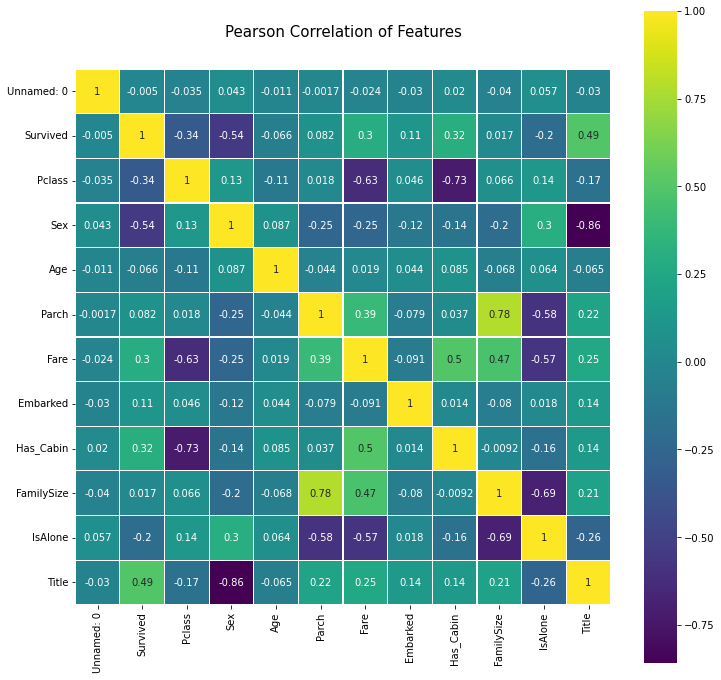

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True, cmap=colormap, linecolor='white', annot=True)

Z etykietą przeżycia najbardziej skorelowane są cechy: płeć, tytuł, has_cabin i Pclass. Najbardziej skorelowane ze sobą są etykiety FamilySize i Parch.

In [3]:
import numpy as np

titles =  np.sort(train['Title'].drop_duplicates().values)
titles_labels = ["Mr", "Master", "Mrs", "Miss", "Rare"]
# 16<= : 0
# >16 <= 32: 1
# >32 <= 48: 2
# >48 <= 64 : 3
# > 64 : 4


for title in titles:
  df_with_given_title = train.loc[train['Title'] == title]
  num_of_all_class = len(df_with_given_title)
  num_of_survived_in_given_class = len(df_with_given_title.loc[train['Survived'] == 1])
  print(titles_labels[title-1], "Survived: ", num_of_survived_in_given_class, "Num of all: ", num_of_all_class, "Ratio: ", num_of_survived_in_given_class/num_of_all_class)
  
  

Mr Survived:  81 Num of all:  517 Ratio:  0.15667311411992263
Master Survived:  23 Num of all:  40 Ratio:  0.575
Mrs Survived:  100 Num of all:  126 Ratio:  0.7936507936507936
Miss Survived:  130 Num of all:  185 Ratio:  0.7027027027027027
Rare Survived:  8 Num of all:  23 Ratio:  0.34782608695652173


In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

train_X, test_X, train_Y, test_Y = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.2)

for i in range(1,15):
  clf = DecisionTreeClassifier(random_state=0, max_depth=i, criterion='gini')
  mean_cross_val_score = cross_val_score(clf, train_X, train_Y, cv=10).mean()
  print("Mean cross val score:", mean_cross_val_score, "Depth:", i)


Mean cross val score: 0.7779929577464788 Depth: 1
Mean cross val score: 0.7933881064162754 Depth: 2
Mean cross val score: 0.8243544600938968 Depth: 3
Mean cross val score: 0.8202073552425665 Depth: 4
Mean cross val score: 0.7963028169014085 Depth: 5
Mean cross val score: 0.8089593114241002 Depth: 6
Mean cross val score: 0.7921165884194054 Depth: 7
Mean cross val score: 0.7879107981220658 Depth: 8
Mean cross val score: 0.7907081377151799 Depth: 9
Mean cross val score: 0.7710680751173709 Depth: 10
Mean cross val score: 0.7753129890453834 Depth: 11
Mean cross val score: 0.748689358372457 Depth: 12
Mean cross val score: 0.7570618153364632 Depth: 13
Mean cross val score: 0.7528560250391237 Depth: 14


Najlepsza głębokośc drzewa wynosi 3.

In [43]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(max_depth = 3,criterion='gini')
decision_tree.fit(train_X, train_Y)
prediction = decision_tree.predict(test)
print(prediction)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 0 0 0 1]


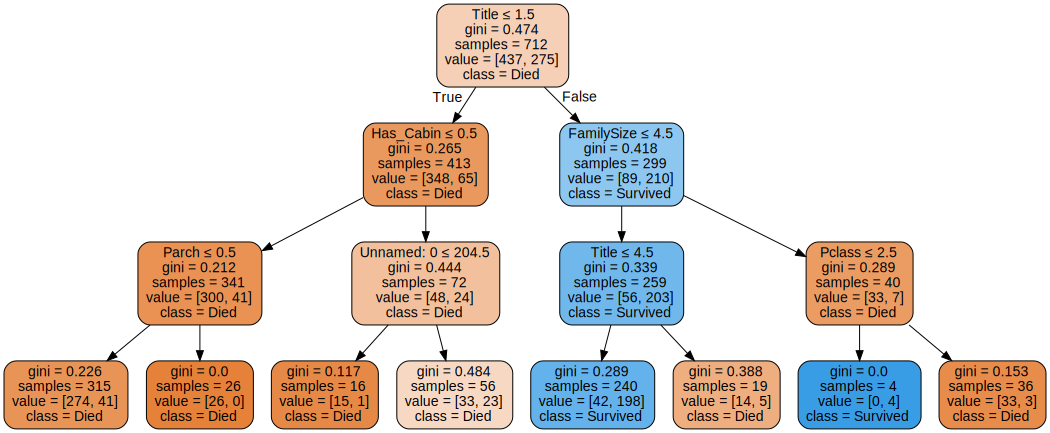

In [44]:
from sklearn import tree
import graphviz


dot_data = tree.export_graphviz(decision_tree, 
                  feature_names=train_X.columns.values.tolist(),  
                  class_names=["Died", "Survived"],  
                  filled=True, rounded=True,  
                  special_characters=True,
                   out_file=None,
                           )
graph = graphviz.Source(dot_data)
graph

In [45]:
criterion_array = ['entropy', 'gini']
maxdepth_array = [1, 2, 3, 5, 10, 15, 20, 25, 30]
min_samples_leaf_array = [1, 2, 3, 4, 5, 10, 100, 200]
                    
for cr in criterion_array:
    decision_tree = tree.DecisionTreeClassifier(max_depth = 3, criterion=cr, min_samples_leaf=5)
    decision_tree.fit(train_X, train_Y)
    print("Criterion", cr, cross_val_score(decision_tree, train_X, train_Y, cv=10).mean())


for md in maxdepth_array:
    decision_tree = tree.DecisionTreeClassifier(max_depth = md, criterion='entropy', min_samples_leaf=7)
    decision_tree.fit(train_X, train_Y)
    print("Max depth", md, cross_val_score(decision_tree, train_X, train_Y, cv=10).mean())
    

for ms in min_samples_leaf_array:
    decision_tree = tree.DecisionTreeClassifier(max_depth = 3, criterion='entropy', min_samples_leaf=ms)
    decision_tree.fit(train_X, train_Y)
    print("Min sample leaf", ms, cross_val_score(decision_tree, train_X, train_Y, cv=10).mean())

Criterion entropy 0.829988262910798
Criterion gini 0.8201291079812206
Max depth 1 0.7794014084507042
Max depth 2 0.7863458528951487
Max depth 3 0.829988262910798
Max depth 5 0.7878325508607199
Max depth 10 0.796244131455399
Max depth 15 0.7934272300469484
Max depth 20 0.7934272300469484
Max depth 25 0.7934272300469484
Max depth 30 0.7934272300469484
Min sample leaf 1 0.8328051643192488
Min sample leaf 2 0.8328051643192488
Min sample leaf 3 0.829988262910798
Min sample leaf 4 0.829988262910798
Min sample leaf 5 0.829988262910798
Min sample leaf 10 0.829988262910798
Min sample leaf 100 0.7821596244131456
Min sample leaf 200 0.7794014084507042


Dla entropy mamy lepszy wynik, najlepsza głębokośc jest dla 3, a zmiana parametru min sample leaf nie polepsza wyniku, jedynie dla dużych wartości zaczyna go pogarszać.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
 train_X, train_Y, test_size=0.25, random_state=1, stratify=train_Y)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


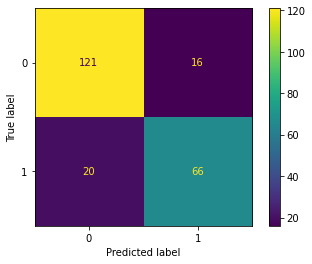

In [32]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix


decision_tree = tree.DecisionTreeClassifier(max_depth = 3,criterion='gini')
decision_tree.fit(X_train, Y_train)
prediction1 = decision_tree.predict(X_test)
conf_matrix = confusion_matrix(prediction1, Y_test)
plot_confusion_matrix(decision_tree, X_test, Y_test)

Nasz model działa dosyć dobrze, większośc elementów przewidział poprawnie.

In [49]:
from sklearn.metrics import accuracy_score, average_precision_score, f1_score
print(accuracy_score(Y_test, prediction1))
print(f1_score(Y_test, prediction1))
print(average_precision_score(Y_test, prediction1))

0.8385650224215246
0.7857142857142858
0.7073832058583388


#kNN clasifier

In [56]:
ny_df = pd.read_csv('nyt-frame.csv', header = 0)
data = df.iloc[:,9:]
array = data.values

In [68]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import KFold

In [53]:

iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                      columns= iris['feature_names'] + ['target'])
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [67]:
pca = PCA()
ny_pca = pca.fit_transform(ny_df.iloc[:,9:].values)
ny_pca = ny_pca[:,0:10]

In [66]:
pca = PCA()
i_pca = pca.fit_transform(iris_df.iloc[:,:-1].values)
i_pca = i_pca[:,0:10]

In [70]:
for i in [1,3,5,7]:
    data = KNN(n_neighbors=i).fit(ny_pca, ny_df.iloc[:,0])
    kfold = KFold(n_splits=10, random_state=None, shuffle=False)
    scores = cross_val_score(data, ny_pca, ny_df.iloc[:,0], cv=kfold)
    print("NYT Accuracy for k =", i, ": ", scores.mean())

NYT Accuracy for k = 1 :  0.0
NYT Accuracy for k = 3 :  0.0
NYT Accuracy for k = 5 :  0.0
NYT Accuracy for k = 7 :  0.0


In [73]:
for i in [1,3,5,7]:
    data = KNN(n_neighbors=i).fit(i_pca, iris_df.iloc[:,4])
    kfold = KFold(n_splits=10, random_state=None, shuffle=False)
    scores = cross_val_score(data, i_pca, iris_df.iloc[:,4], cv=kfold)
    print("Iris Accuracy for k =", i, ": ", scores.mean())

Iris Accuracy for k = 1 :  0.96
Iris Accuracy for k = 3 :  0.9466666666666667
Iris Accuracy for k = 5 :  0.9333333333333333
Iris Accuracy for k = 7 :  0.9333333333333333


In [74]:

for metric in ['euclidean', 'manhattan']:
    data = KNN(n_neighbors=7, metric=metric).fit(ny_pca,ny_df.iloc[:,1])
    kfold = KFold(n_splits=10, random_state=None, shuffle=False)
    scores = cross_val_score(data, ny_pca, ny_df.iloc[:,1], cv=kfold)
    print("NYT Accuracy for metric =", metric, ": ", scores.mean())

NYT Accuracy for metric = euclidean :  0.8018181818181818
NYT Accuracy for metric = manhattan :  0.7627272727272727


In [75]:

for metric in ['euclidean', 'manhattan']:
    data = KNN(n_neighbors=1, metric=metric).fit(i_pca,iris_df.iloc[:,4])
    kfold = KFold(n_splits=10, random_state=None, shuffle=False)
    scores = cross_val_score(data, i_pca, iris_df.iloc[:,4], cv=kfold)
    print("Iris Accuracy for metric =", metric, ": ", scores.mean())

Iris Accuracy for metric = euclidean :  0.96
Iris Accuracy for metric = manhattan :  0.9466666666666667


In [76]:
for weight in ['uniform', 'distance']:
    for metric in ['euclidean', 'manhattan']:
        data = KNN(n_neighbors=7, metric=metric, weights=weight).fit(ny_pca,ny_df.iloc[:,1])
        kfold = KFold(n_splits=10, random_state=None, shuffle=False)
        scores = cross_val_score(data, ny_pca, ny_df.iloc[:,1], cv=kfold)
        print("NYT Accuracy for metric =", metric, " weight =", weight, ": ", scores.mean())

NYT Accuracy for metric = euclidean  weight = uniform :  0.8018181818181818
NYT Accuracy for metric = manhattan  weight = uniform :  0.7627272727272727
NYT Accuracy for metric = euclidean  weight = distance :  0.8018181818181818
NYT Accuracy for metric = manhattan  weight = distance :  0.7827272727272727


Zmiana wagi na distance poprawia wynik w stosunku do uniform

In [77]:

for weight in ['uniform', 'distance']:
    for metric in ['euclidean', 'manhattan']:
        data = KNN(n_neighbors=1, metric=metric, weights=weight).fit(i_pca,iris_df.iloc[:,4])
        kfold = KFold(n_splits=10, random_state=None, shuffle=False)
        scores = cross_val_score(data, i_pca, iris_df.iloc[:,4], cv=kfold)
        print("Iris Accuracy for metric =", metric, " weight =", weight, ": ", scores.mean())

Iris Accuracy for metric = euclidean  weight = uniform :  0.96
Iris Accuracy for metric = manhattan  weight = uniform :  0.9466666666666667
Iris Accuracy for metric = euclidean  weight = distance :  0.96
Iris Accuracy for metric = manhattan  weight = distance :  0.9466666666666667


Dla zbioru Iris wagi nie mają znaczenia